# Implementacja DFT
Laboratorium 10 - Metody Obliczeniowe w Nauce i Technice

In [1]:
import numpy as np
import cmath
import os
import matplotlib.pyplot as plt
import time

In [2]:
def xi(n):
    PI = np.pi
    return cmath.exp(-2j*PI / n)


def fill_fouriers_matrix(F, XI):
    n = len(F)
    for j in range(n):
        for k in range(n):
            F[j][k] = XI**(j * k)
            
    return F


def dft(x, n):
    XI = xi(n)
    F = np.empty((n, n), dtype=np.csingle)
    F = fill_fouriers_matrix(F, XI)
    
    y = F @ x
    return y, F       


n = 2**3
x = np.random.randint(0, 101, n)
y, F = dft(x, n)
y

array([372.         +0.j        , -47.58073413 +8.24264061j,
       -16.        -24.j        , 147.58073413 +0.24264061j,
       -84.         +0.j        , 147.58073413 -0.24264061j,
       -16.        +24.j        , -47.58073413 -8.24264061j])

In [3]:
# Evaluating inverse x vector
x_idft = np.conjugate(F @ np.conjugate(y)) / n

# Comparing own DFT with own IDFT
print(f"x{os.linesep}", x, end=2 * os.linesep)
print(f"x given by IDFT{os.linesep}", x_idft, end=2 * os.linesep)
print("Comparing above 2 matrices: ", np.allclose(x, x_idft))

print(2 * os.linesep)

# Comparing own DFT with NumPy's FFT
print(f"y{os.linesep}", y, end=2 * os.linesep)
y_fft = np.fft.fft(x)
print(f"y given by NumPy's FFT{os.linesep}", y_fft, end=2 * os.linesep)
print("Comparing above 2 matrices: ", np.allclose(y, y_fft))

x
 [57 27 38 84  7 99 42 18]

x given by IDFT
 [57.        -0.0000000e+00j 27.00000123-0.0000000e+00j
 38.        -0.0000000e+00j 83.99999887+8.8817842e-16j
  7.        -0.0000000e+00j 98.99999877-8.8817842e-16j
 42.        -0.0000000e+00j 18.00000113-0.0000000e+00j]

Comparing above 2 matrices:  True



y
 [372.         +0.j         -47.58073413 +8.24264061j
 -16.        -24.j         147.58073413 +0.24264061j
 -84.         +0.j         147.58073413 -0.24264061j
 -16.        +24.j         -47.58073413 -8.24264061j]

y given by NumPy's FFT
 [372.        +0.j         -47.5807358 +8.24264069j
 -16.       -24.j         147.5807358 +0.24264069j
 -84.        +0.j         147.5807358 -0.24264069j
 -16.       +24.j         -47.5807358 -8.24264069j]

Comparing above 2 matrices:  True


In [36]:
def fft(x):
    n = len(x)
    if n <= 2:
        return dft(x, n)
    
    x_even = fft(x[::2])
    x_odd = fft(x[1::2])
    terms = np.exp(-2j * np.pi * np.arange(n) // n)
    
    return np.concatenate([
        x_even + terms[:n // 2] * x_odd,
        x_even + terms[n // 2:] * x_odd
    ])

#### Porównanie wydajności funkcji DFT i FFT

In [35]:
for r in range(7):
    print(f"Performance for n = 2^{r}")
    n = 2**r
    x = np.random.randint(0, 101, n)
    
    print("Own DFT")
    %timeit dft(x, n)
    print("Own FFT")
    %timeit fft(x)
    print("NumPy FFT")
    %timeit np.fft.fft(x)
    
    print(2 * os.linesep)

Performance for n = 2^0
Own DFT
7.5 µs ± 1.21 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Own FFT
9.98 µs ± 467 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
NumPy FFT
5.26 µs ± 514 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)



Performance for n = 2^1
Own DFT
15.4 µs ± 4.53 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Own FFT
11.2 µs ± 1.39 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
NumPy FFT
4.77 µs ± 460 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)



Performance for n = 2^2
Own DFT
19.1 µs ± 932 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Own FFT


C:\Users\Jakub\AppData\Local\Temp\ipykernel_18908\1850133818.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_even + terms[:n // 2] * x_odd,


ValueError: could not broadcast input array from shape (2,2) into shape (2,)

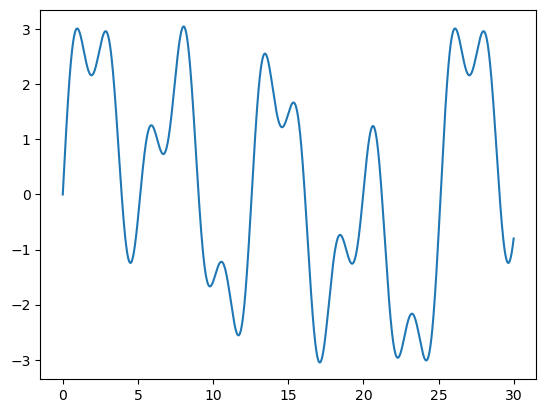

In [24]:
n = 5
SS = np.empty(n, dtype=np.ndarray)
xs = np.arange(0, 30, .01)
for i, t in enumerate(((.5, 1), (1, 1), (1, .5), (3, .25), (2, 2.5))):
    a, b = t
    SS[i] = np.sin(b * xs)
    
S0 = np.zeros(len(SS[0]))
for i in range(len(SS[0])):
    for j in range(n):
        S0[i] += SS[j][i]

fig, ax = plt.subplots()
ax.plot(xs, S0)
plt.show()

600


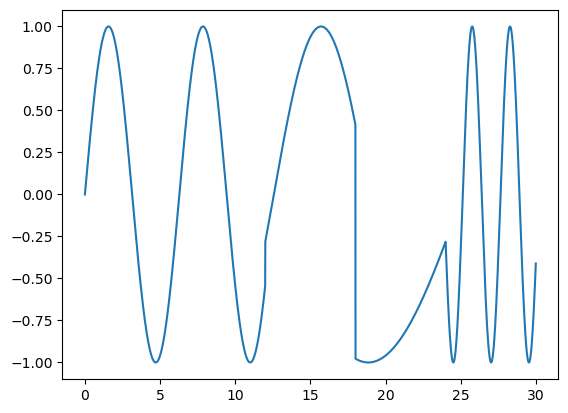

In [33]:
step = len(SS[0]) // n
S1 = SS[0][:step]
print(step)
for j in range(1, n):
    S1 = np.concatenate((S1, SS[j][j * step:(j + 1) * step]))

fig, ax = plt.subplots()
ax.plot(xs, S1)
plt.show()